 <div align = "center"><b>
    <span style="font-size:2.0em;">DIGITALANA OBRADA SLIKE - prvi domaći zadatak</span>
    <br/>
    <span style="font-size:1.2em;">
    Milovan Purić 0207/2016 </span></b></div>

---

In [8]:
# Makro koji postavljamo na vrednost true samo kada generisemo pdf
GENERATE_PDF = True

In [9]:
# Ukljucivanje biblioteka
from matplotlib import *
from pylab import *
if GENERATE_PDF: 
    %matplotlib inline
else:
    %matplotlib widget

from skimage import *
from skimage.color import *
from skimage.exposure import *
from skimage.filters import *

import numpy as np
import matplotlib.pylab as plt

from ipywidgets import interact,interactive, fixed, interact_manual

if GENERATE_PDF:
    ;
else:
    plt.style.use('dark_background')
    
import imageio

# Prvi zadatak

Slika *sea.hdr* predstavlja scenu širokog dinamičkog opsega direktno snimljenu sa senzora, bez gama
korekcije. Ulaznu sliku je pre transformacije potrebno skalirati u opseg $[0, 1]$.

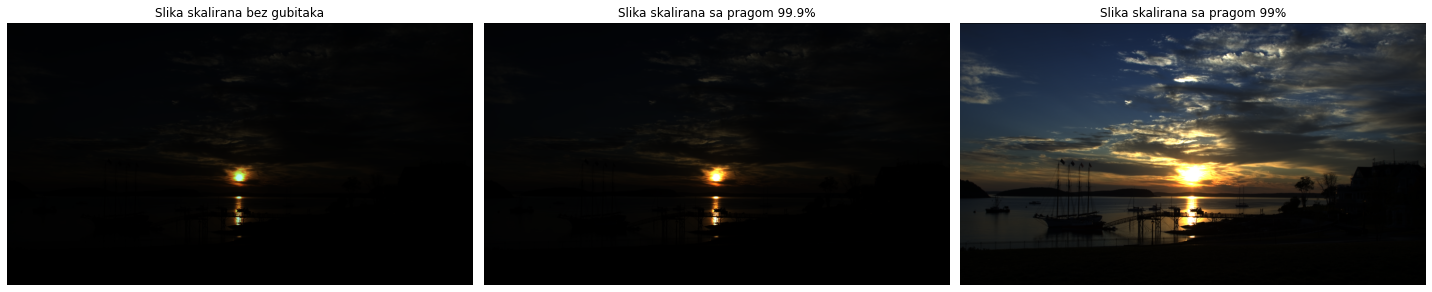

In [3]:
# Ucitavanje ulazne hdr slike koriscenjem imread funkije iz biblioteke imageio
img1 = imageio.imread('./sekvence/sea.hdr', format='HDR-FI')

img1 = img1 / max(img1.flatten()) # Skaliranje bez gubitaka na opseg [0,1]

# Skalinranje gde je 0.1% najsvetlijih piksela zasiceno na 1
p_01 = np.percentile(img1, 99.9)
img1_rescale_01 = rescale_intensity(img1, in_range = (0,p_01), out_range = (0,1))

# Skalinranje gde je 1% najsvetlijih piksela zasiceno na 1
p_1 = np.percentile(img1, 99)
img1_rescale_1 = rescale_intensity(img1, in_range = (0,p_1), out_range = (0,1))

#Prikazivanje slika
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,12), sharex = True, sharey = True)

for i in range(3):
    ax[i].set_axis_off()

ax[0].imshow(img1); ax[0].set_title('Slika skalirana bez gubitaka')
ax[1].imshow(img1_rescale_01); ax[1].set_title('Slika skalirana sa pragom 99.9%')
ax[2].imshow(img1_rescale_1); ax[2].set_title('Slika skalirana sa pragom 99%')

plt.tight_layout()
plt.show()

## Tačka (a)

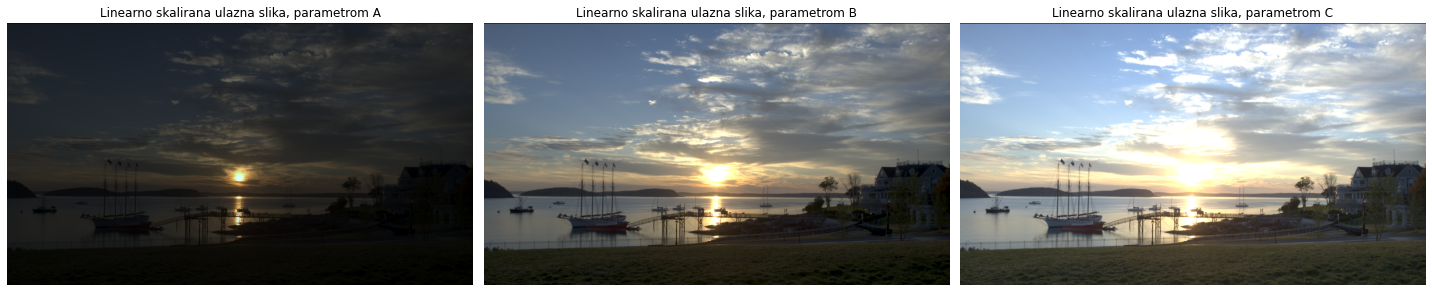

In [4]:
# Linearno mapiranje
def linear_maping(img, p1, p2):
    """""
    *Funkcija vrsi linearno mapiranje tako sto p1% najtamnijih piksela zasiti na vrednost 0, a p2% najsvetlijih na vrednost p2%.
    *Tako dobijenoj slici se vrsi gama korekcija sa faktorom 1/2.2
    *argumenti funkcije:
        img - ulazna slika
        p1 - donja granica
        p2 - gornja granica
    """
    t1, t2 = np.percentile(img.flatten(), (p1,p2))
    g = rescale_intensity(img, in_range=(t1,t2), out_range=(0,1))
    g = adjust_gamma(g, 1/2.2)
    
    if GENERATE_PDF:
        return g
    else:
        plt.figure(figsize=(10,5),); axis('off')
        imshow(g, vmin=0, vmax=1, cmap='gray')

        
if GENERATE_PDF:
    # Koriscenje parametra odredjenog preko interact-a
    img_A = linear_maping(img1, 3, 100)
    img_B = linear_maping(img1, 2, 99)
    img_C = linear_maping(img1, 0, 92)
    
    #Prikazivanje slika
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,12), sharex = True, sharey = True)

    for i in range(3):
        ax[i].set_axis_off()

    ax[0].imshow(img_A); ax[0].set_title('Linearno skalirana ulazna slika, parametrom A')
    ax[1].imshow(img_B); ax[1].set_title('Linearno skalirana ulazna slika, parametrom B')
    ax[2].imshow(img_C); ax[2].set_title('Linearno skalirana ulazna slika, parametrom C')

    plt.tight_layout()
    plt.show()
else:
    interact(linear_maping, img=fixed(img1), p1 = (0, 100, 1), p2 = (0, 100, 1))

## Tačka (b)

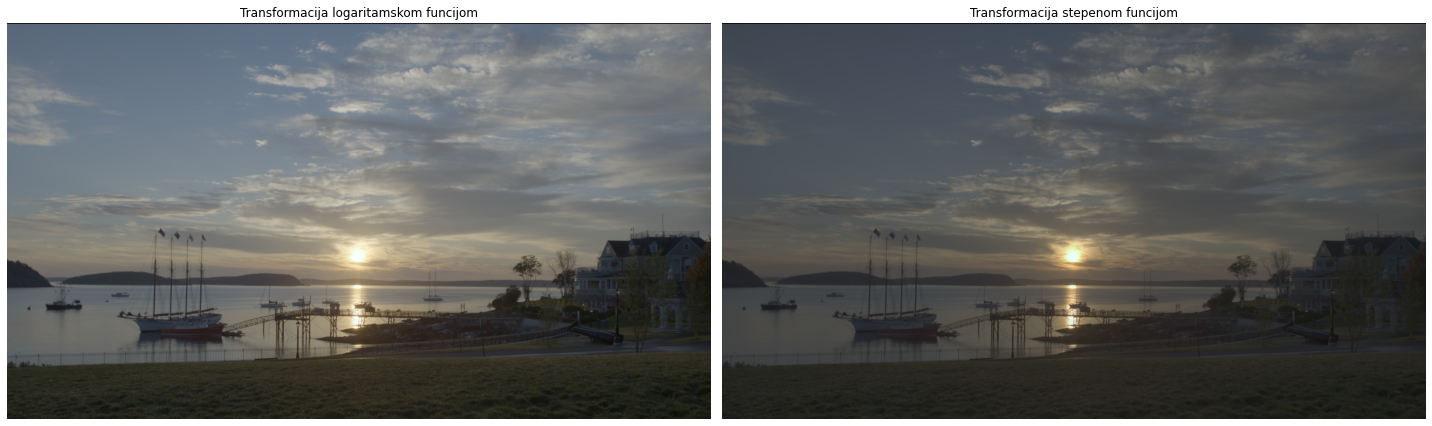

In [5]:
# Logaritamska transformacija slike
def log_transform(img,c):
    """""
    *Funkcija vrsi logaritamsku transformaciju ulazne slike prema formuli y = log(1 + (10**c)*img), a zatim se vrsi gama korekcija tako dobijene slike
    *Argumenti funkcije:
        img - ulazna slika
        c - koeficijent
    """
    y = log(1 + (10**c) * img) / log(1 + 10**c)
    y = adjust_gamma(y, 1/2.2)
    
    if GENERATE_PDF:
        return y
    else:
        plt.figure(figsize=(10,5),); axis('off')
        imshow(y, vmin=0, vmax=1, cmap='gray')
        

#Stepena transformacija slike
def power_transform(img,gamma,c=1):
    """""
    *Funkcija vrsi stepenu transformaciju ulazne slike prema formuli y = img**gamma, a zatim se vrsi gama korekcija tako dobijene slike
    *Argumenti funkcije:
        img - ulazna slika
        gamma = stepen
        c - koeficijent
    """
    y = c*(img**gamma)
    y = adjust_gamma(y, 1/2.2)
    
    if GENERATE_PDF:
        return y
    else:
        plt.figure(figsize=(10,5),); axis('off')
        imshow(y, vmin=0, vmax=1, cmap='gray')
        

if GENERATE_PDF:
    # Koriscenje parametra odredjenog preko interact-a
    img_log = log_transform(img1, 2)
    img_power = power_transform(img1, 0.6, 1)
    
    #Prikazivanje slika
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,12), sharex = True, sharey = True)

    ax[0].imshow(img_log); ax[0].set_title('Transformacija logaritamskom funcijom'); ax[0].set_axis_off()
    ax[1].imshow(img_power); ax[1].set_title('Transformacija stepenom funcijom'); ax[1].set_axis_off()

    plt.tight_layout()
    plt.show()
else:
    interact(log_transform, img=fixed(img1), c = (0,10,0.2))
    interact(power_transform, img=fixed(img1), gamma = (0,25,0.1), c = (0,1,0.01))

## Tačka (c)

In [6]:
def interporal(img, a, b, c, d):
    """"
    *Funkcija interpolar vrsi linearnu interpolaciju ulazne slike intezitete [0,a] preslikava u [0,c], [a,b] u [c,d] i [b,1] u [d,1]
    *Argumenti funkcije:
        img - ulazna slika
        a - prva ulazna granica
        b - druga ulazna granica
        c - prva izlazna granica
        d - druga izlazna granica
    """
    x_val=[0,a,b,1]
    y_val=[0,c,d,1]
    g = interp(img,x_val,y_val)
    g = adjust_gamma(g, 1/2.2)
   
    if GENERATE_PDF:
        return g
    else:
        plt.figure(figsize=(10,5),); axis('off')
        imshow(g, vmin=0, vmax=1, cmap='gray')
        
    
if GENERATE_PDF:
    # Koriscenje parametra odredjenog preko interact-a
    img_interpolar = interporal(img1, 0.11, 0.89, 0.3, 0.88)
    
    #Prikazivanje slika
    plt.figure(figsize=(10,5),); axis('off')
    imshow(img_interpolar, vmin=0, vmax=1, cmap='gray'); title('Koriscena transformacija interpolacijom')
else:
    interact(interporal, img=fixed(img1), a = (0, 1, 0.01), b = (0, 1, 0.01), c = (0, 1, 0.01), d = (0, 1, 0.01))

# Drugi zadatak

Potrebno je realizovati selektivnu dekolorizaciju slika *marlyn.jpg* i *street.jpg*. Selektivna dekolorizacija podrazumeva da se slika u boji konvertuje u sivu sliku osim određenih delova koji treba da ostanu u boji.

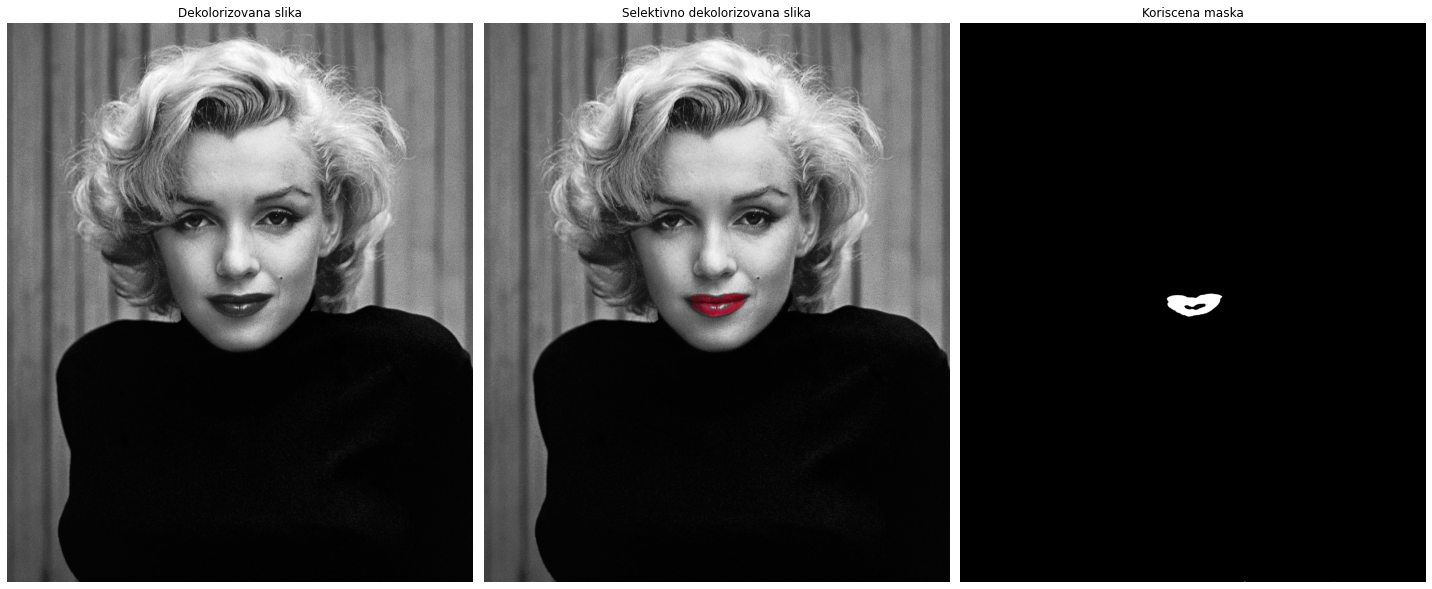

In [10]:
# Ucitavanje slike marlyn.jpg
img_21 = imread('./sekvence/marlyn.jpg')

# funkcija za odredjivanje maske za pronalazenje zadatog regiona
def mask_gen1(img, p1, d):
    """
    *Funkcija mask_gen1, generise masku za selektivnu dekolorizaciju slike marlyn.jpg, sliku prvu prebacimo u HSV format i izdvojimo S(saturation sloj)
    zatim taj sloj poredimo sa zadatim pragom i na kraju filtriramo median filtrom da bi smo uklonili nezenjene delove
    *argumenti funkcije:
        img - ulazna slika
        p1 - prag za poredjenje
        d - dimenzije median filtra
    
    """
    img_hsv = rgb2hsv(img)
    img_s = img_hsv[:,:,1]
    mask = zeros(shape(img_s))
    mask[img_s > p1] = 1
    mask_filt = filters.median(mask, np.ones(shape=(d,d)))
    
    if GENERATE_PDF:
        return mask_filt
    else:
        plt.figure(figsize=(10,5),); axis('off')
        imshow(mask_filt, vmin=0, vmax=1, cmap='gray')

if GENERATE_PDF:
    mask = img_as_bool(mask_gen1(img_21, 0.75, 16)) # konacne vrednosti odredjene preko interact-a
    
    img_21_gray = rgb2gray(img_21)
    
    img_21_final = gray2rgb(img_21_gray)
    img_21_final[mask] = img_as_float(img_21[mask]) # prikazivanje boja u odredjenom regionu kao na orginalnoj slici

    #Prikazivanje slika
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,12), sharex = True, sharey = True)

    ax[0].imshow(img_21_gray, vmin=0, vmax=1, cmap='gray'); ax[0].set_title('Dekolorizovana slika'); ax[0].set_axis_off()
    ax[1].imshow(img_21_final); ax[1].set_title('Selektivno dekolorizovana slika'); ax[1].set_axis_off()
    ax[2].imshow(mask, vmin=0, vmax=1, cmap='gray'); ax[2].set_title('Koriscena maska'); ax[2].set_axis_off()

    plt.tight_layout()
    plt.show()
else:
    interact(mask_gen1, img=fixed(img_21), p1 = (0, 1, 0.01), d = (1,41,1))

Kod slike *marlyn.jpg*, pošto je crvena boja najzasićenija sliku smo prebacili u HSV kolor sistem i posmatrali S sloj, na njemu smo vršili binarizaciju sa zadatim pragom, a zatim filtriranje median filtrom da bi uklonili neke sitne piksele sa manjom saturacijom. Da bi sve moglo interaktivno da se menja preko widget-a *interact*, napravljena je funkicja *mask_gen1*. Menjanjem vrednosti praga binarizacije i veličine median filtra određene su vrednosti za generisanje maske i njenom primenom izvršena selektivna dekolorizacija slike.

In [11]:
# Ucitavanje slike street.jpg
img_22 = imread('./sekvence/street.jpg')

# funkcija za odredjivanje maske za pronalazenje zadatog regiona
def mask_gen2(img, tr1=0, tr2=255, tg1=0, tg2=255, tb1=0, tb2=255, d = 1):
    """
    *Funkcija mask_gen2, generise masku za izdvajanje regiona ciji je intezitet R, G, B boje u odredjenim granicama. Iz ulazne slike u RGB formatu izdvojimo slojeve R,G,B
    i svaki od njih poredimo za zadatim gornjim i donjim pragom. Samo delovi slike ciji se svaki sloj nalazi u zadatim okvirima postaje deo maske.
    Na kraju masku filtriramo median filrom zadate velicine da bismo uklonili nezeljene manje regione koji imaju zadatu boju
    *argumenti funkcije:
        img - ulazna slika
        tr1 - donja granica crvene boje
        tr2 - gornja granica crvene boje
        tg1 - donja granica zelene boje
        tg2 - gornja granica zelene boje
        tb1 - donja granica plave boje
        tb2 - gornja granica plave boje
        d - dimenzije median filtra
    
    """
    img_r = img[:,:,0]
    img_g = img[:,:,1]
    img_b = img[:,:,2]
    m, n = np.shape(img_r)
    mask = zeros(shape(img_r), dtype=bool)
    for i in range(m):
        for j in range(n):
            mask[i,j] = img_r[i,j]>tr1 and img_r[i,j]<tr2 and img_g[i,j]>tg1 and img_g[i,j]<tg2 and img_b[i,j]>tb1 and img_b[i,j]<tb2
    mask = img_as_float(mask)
    
    mask_filt = filters.median(mask, np.ones(shape=(d,d)))

    if GENERATE_PDF:
        return mask_filt
    else:
        plt.figure(figsize=(10,5),); axis('off')
        imshow(mask_filt, vmin=0, vmax=1, cmap='gray')
    
if GENERATE_PDF:
    mask = img_as_bool(mask_gen2(img_22, 190, 255, 190, 255, 0, 185, 10)) # konacne vrednosti odredjene preko interact-a
    
    img_22_gray = rgb2gray(img_22)
    
    img_22_final = gray2rgb(img_22_gray)
    img_22_final[mask] = img_as_float(img_22[mask]) # prikazivanje boja u odredjenom regionu kao na orginalnoj slici

    #Prikazivanje slika
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,12), sharex = True, sharey = True)

    ax[0].imshow(img_22_gray, vmin=0, vmax=1, cmap='gray'); ax[0].set_title('Dekolorizovana slika'); ax[0].set_axis_off()
    ax[1].imshow(img_22_final); ax[1].set_title('Selektivno dekolorizovana slika'); ax[1].set_axis_off()
    ax[2].imshow(mask, vmin=0, vmax=1, cmap='gray'); ax[2].set_title('Koriscena maska'); ax[2].set_axis_off()
    
    plt.tight_layout()
    plt.show()
else:
    interact(mask_gen2,img = fixed(img_22), tr1 = (0, 255, 1), tr2 = (0, 255, 1), tg1 = (0, 255, 1), tg2 = (0, 255, 1), tb1 = (0, 255, 1), tb2 = (0, 255, 1), d = (1,50,1))   

Kod slike *street.jpg* trebalo je izdvojiti kišobran čija je boja jako specificna na slici. Napravljena je funkcija *mask_gen2* koja za zadate gornje i donje granice, za svaku od RGB boja, izdvaja region koji se nalazi u tim granicama. Zatim se primenom median filtra uklone neželjeni pikseli koji ne pripadaju traženom regionu. Korišćenjem widget-a *interatc* odredjene su granice za svaku od boja i napravljena maska za selektivnu dekolorizaciju.

---

# Treći zadatak
Pravimo funkciju *bilateral_filter* koja filtrira ulaznu sliku izbegavajući zamućivanje
značajnih ivica. Težine bilateralnog filtra prilikom filtriranja piksela na poziciji $[m,n]$ su
date sledećim izrazima:<br/>
\begin{equation}
w[k,l]=e^{\frac{k^2+l^2}{2\sigma_s^2}-\frac{(x[m+k,n+l]-x[m,n])^2}{2\sigma_r^2}}
\end{equation}
\begin{equation}
k,l \in [-r,r]
\end{equation}
Radijus filtra je $r$ odnosno prostorna maska je dimenzija $(2r + 1)\times(2r + 1)$ . Dimenzije slike
su $M \times N$ .

In [12]:
def bilateral_filter(x, radius, sigma_s, sigma_r):
    """""
    *Funkcija bilateral_filter filtrirar ulaznu sliku izbegavajuci zamucenje znacajnih ivica. 
    *Argumenti funkcije:
        x - ulazna slika tipa uint8 ili double
        radius - radius filtra
        sigma_s - standardna devijacija
        sigma_r - standardna devijacija za intazitete
    """
    # Provera ispravnosti ulaza
    if not isinstance(x, np.ndarray) or (x.dtype != 'double' and x.dtype != 'uint8') or x.ndim != 2:
        raise ValueError('Image is not in right format')
    
    img = img_as_float64(x);
    M, N = shape(img)
    
    # Prosirivanje slike
    img1 = np.pad(img, (radius,radius), mode='reflect')
    
    # Definisanje pomocne lokalne funkcije gauss(a,b) = e**(-a/(2(b**2)))
    def gauss(a,b):
        y = np.exp(-0.5*a/b**2)
        return y
    
    # Inicijalizacija izlazne slike
    y = zeros(shape(img1))
    w_sum = 0
    
    # Izracunavanje
    for k in range(-radius,radius+1):
        for l in range(-radius,radius+1):
            # Prostorna tezina
            wp = gauss(k**2+l**2, sigma_s) # prostorna tezina filtra
            
            # Siftovanje za k i l
            shift = np.roll(img1, [l, k], axis=[0,1]) # clan x[m+k,n+l]
            
            # Dodavanje tezinske funkcije piksela u masci
            w = wp*gauss((shift-img1)**2, sigma_r)
            
            # Akumulacija rezultata
            y += shift*w
            w_sum += w
    
    # Normalizalizacija
    y = y/w_sum
    
    # Uklanjanje prosirenja
    y1 = y[radius:(radius+M),radius:(radius+N)]
    
    # Izlazna slika treba da bude istog tipa kao ulazna 
    if x.dtype == 'uint8':
        y1 = img_as_ubyte(y1)
    
    return y1    

In [13]:
import time
from skimage import restoration
# Testiranje funkije koriscena slika lena.tif

img3 = imread('lena.tif')

radius = [2, 4, 20, 40]
sigma_s = [0.5, 1, 6, 13]
sigma_r = 0.2

[m, n] = shape(img3)
img3_bilateral_filter = zeros((m,n,4))
img3_denoise_bilateral = zeros((m,n,4))

for i in range(4):
    start = time.time()
    img3_bilateral_filter[:,:,i] = bilateral_filter(img3, radius[i], sigma_s[i], sigma_r)
    end = time.time()

    execution_time = end - start
    print("Vreme izvrsavanja funkcije bilateral_filter za r=" + str(radius[i]) + ": " + str(round(execution_time,3))+ "s \n")

    start = time.time()
    img3_denoise_bilateral[:,:,i] = restoration.denoise_bilateral(img3, radius[i], sigma_r, sigma_s[i])
    end = time.time()

    execution_time = end - start
    print("Vreme izvrsavanja funkcije denoise_bilater za r" + str(radius[i]) + ": " + str(round(execution_time,3))+ "s \n")


Vreme izvrsavanja funkcije bilateral_filter za r=2: 0.21s 

Vreme izvrsavanja funkcije denoise_bilater za r2: 0.013s 

Vreme izvrsavanja funkcije bilateral_filter za r=4: 0.662s 

Vreme izvrsavanja funkcije denoise_bilater za r4: 0.046s 

Vreme izvrsavanja funkcije bilateral_filter za r=20: 15.411s 

Vreme izvrsavanja funkcije denoise_bilater za r20: 1.69s 

Vreme izvrsavanja funkcije bilateral_filter za r=40: 69.921s 

Vreme izvrsavanja funkcije denoise_bilater za r40: 7.113s 



Text(0.5, 1.0, 'Orginalna slika')

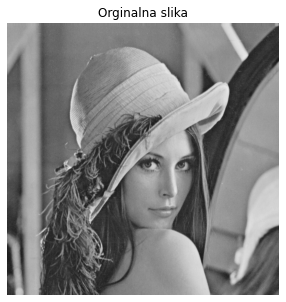

In [14]:
# Prikazivanje orginalne slike
plt.figure(figsize=(10,5),); axis('off')
imshow(img3_denoise_bilateral[:,:,2], vmin=0, vmax=1, cmap='gray'); title('Orginalna slika')

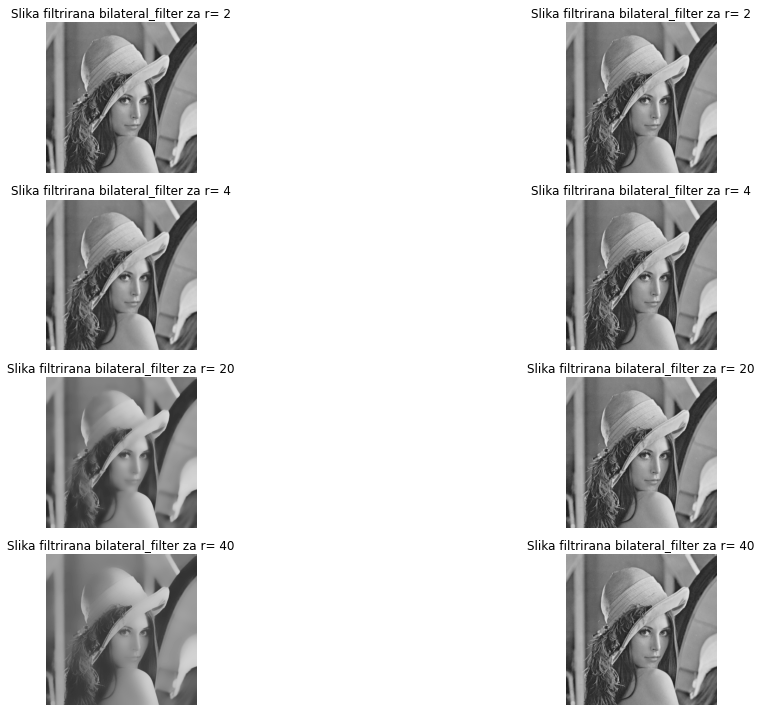

In [15]:
# Prikazivanje slika primenom filtara

fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (20,10), sharex = True, sharey = True)
ax
for i in range(4):
    ax[i, 0].imshow(img3_bilateral_filter[:,:,i], vmin=0, vmax=255, cmap='gray'); ax[i, 0].set_title('Slika filtrirana bilateral_filter za r= %d' %radius[i]); ax[i,0].set_axis_off()
    ax[i, 1].imshow(img3_denoise_bilateral[:,:,i], vmin=0, vmax=1, cmap='gray'); ax[i, 1].set_title('Slika filtrirana bilateral_filter za r= %d' %radius[i]); ax[i,1].set_axis_off()

plt.tight_layout()
plt.show()